# 機械学習 課題4

※ セルを増やしても構いませんが、すでに書かれているセルの内容を変更しないで下さい。

**この課題におけるベクトルは縦ベクトルとします。**

## 1. モデルの学習

ある訓練データを用い、多クラスロジスティック回帰モデルを確率的勾配降下法で学習したところ、以下に示す２つのグラフが得られた。これらのグラフの横軸は確率的勾配降下法の反復回数（パラメータの更新を行うために処理された訓練事例の数）で、縦軸は異なる二つの指標、すなわち左側のグラフでは①、右側のグラフでは②の値を表している。青色の実線は訓練データに対する指標の値、赤色の点線は検証データに対する指標の値をプロットしたものである。以下の問に答えよ。

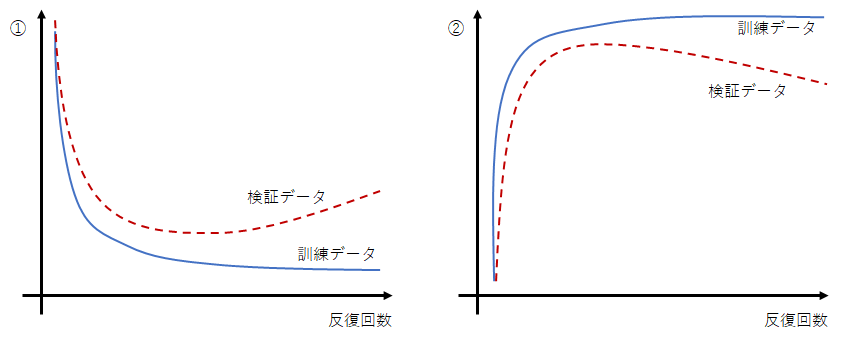


(1) 左側のグラフは、モデルのパラメータが訓練データに適合した度合いを反映するものである。左側のグラフの①（縦軸）を埋めるのに適切な用語をひとつ答えよ（複数の正解が考えられるが、そのうちのひとつを答えればよい）。ただし、縦軸は矢印の方向に向かって値が大きくなることに注意せよ。<!-- 1(1) -->

損失関数の値

(2) 右側のグラフは、モデルの分類性能を反映するものである。右側のグラフの②（縦軸）を埋めるのに適切な用語をひとつ答えよ（複数の正解が考えられるが、そのうちのひとつを答えればよい）。ただし、縦軸は矢印の方向に向かって値が大きくなることに注意せよ。<!-- 1(2) -->

正解率

(3) 検証データに対しては、左側のグラフでは反復回数が増えるにつれて値がじわじわ上昇し、右側のグラフでは反復回数が増えるにつれて値が下降している。この現象を最も的確に表す用語を答えよ。また、その用語について説明せよ。<!-- 1(3) -->

過学習: 訓練データを厳密に再現しようとした結果、汎化性能が低いモデルが学習されてしまう状況。

(4) (3)の減少を軽減するために取り得る対策を一つ説明せよ。その対策を表す用語と、その対策の内容を説明せよ。<!-- 1(4) -->

$L_2$正則化: $\hat{J(w)} = \hat{L(w)} + \alpha R(w)$のように、訓練データの適合度に加え、パラメータ$w$の複雑さを表現する関数$R(w)$に関するペナルティ項を追加する。

## 2. 多クラスロジスティック回帰

2次元の事例$\pmb{x} \in \mathbb{R}^{2}$を受け取り、3個のクラス$\mathcal{C}_1, \mathcal{C}_2, \mathcal{C}_3$のいずれかに分類する多クラスロジスティック回帰モデルを考える。事例$\pmb{x}$がクラス$\mathcal{C}_j$ $(j \in \{1, 2, 3\})$に分類される条件付確率$P(\hat{y}=\mathcal{C}_j|\pmb{x})$を以下の式で求める。

\begin{align}
P(\hat{y} = \mathcal{C}_j|\pmb{x}) = \frac{\exp (\pmb{w}_j^\top\pmb{x} + b_j)}{\sum_{k=1}^{3} \exp (\pmb{w}_k^\top\pmb{x} + b_k)}
\end{align}

ここで、$\pmb{w}_1, \pmb{w}_2, \pmb{w}_3 \in \mathbb{R}^{2}$と$b_1, b_2, b_3 \in \mathbb{R}$はモデルのパラメータであり、以下に示す値に設定されているとする。

\begin{gather}
\pmb{w}_1 = \begin{pmatrix}0 \\ 1\end{pmatrix}, \;
\pmb{w}_2 = \begin{pmatrix}1 \\ 0\end{pmatrix}, \;
\pmb{w}_3 = \begin{pmatrix}-1 \\ -1\end{pmatrix} \\
b_1 = 1, \; b_2 = -1, \; b_3 = 0
\end{gather}

いま、$\mathcal{C}_2$に分類されるべき訓練事例、

\begin{gather}
\pmb{x}_1 = \begin{pmatrix}1 \\ -1\end{pmatrix}
\end{gather}

が与えられたとする。以下の問に答えよ。なお、計算は手計算でもプログラムを用いてもよいが、最終的な答えに至る経過が分かるように記述せよ。

(1) このモデルの訓練事例$\pmb{x}_1$に対する尤度を求めよ。<!-- 2(1) -->

In [1]:
import numpy as np

x1 = np.array([1, -1])


def multi_class_logistic_regression_p(x: np.ndarray) -> np.ndarray:
    """
    Multi-class Logistic Regression
    """
    w1 = np.array([0, 1])
    w2 = np.array([1, 0])
    w3 = np.array([-1, -1])
    W = np.array([w1, w2, w3])

    b1, b2, b3 = 1, -1, 0
    B = np.array([b1, b2, b3])

    y = np.zeros(B.shape[0], dtype=np.float64)
    for i in range(B.shape[0]):
        y[i] = np.exp((W[i, :].T) @ x + B[i])

    return y / np.sum(y)


print(multi_class_logistic_regression_p(x1))

[0.33333333 0.33333333 0.33333333]


よって、0.33333333

(2) このモデルのパラメータを負の対数尤度を目的関数とする確率的勾配降下法で更新することを考える。目的関数に対する各パラメータ（$\pmb{w}_1, \pmb{w}_2, \pmb{w}_3, b_1, b_2, b_3$）の勾配を求めよ。<!-- 2(2) -->

$$- \log \hat{l}_{(\pmb{x}, \pmb{y})}(\pmb{W}) = - \log \prod_{k=1}^K p_k^{y_k} = - \sum_{k=1}^K y_k \log p_k$$
より

$$- \frac{\partial \log \hat{l}_{(\pmb{x}, \pmb{y})}(\pmb{W})}{\partial \pmb{w}_j} = - \sum_{k=1}^K \frac{\partial}{\partial \pmb{w}_j}(y_k \log p_k) = - \sum_{k=1}^K \frac{y_k}{p_k} \frac{\partial p_k}{\partial \pmb{w}_j}$$
であるので、また

機械学習帳 (6.33)より
$$\frac{\partial \log{\hat{l}_(x,y)(W)}}{\partial w_j} = - \pmb{x} (y_j - p_j)$$
となる。

また、
$$ - \frac{\partial \log \hat{l}_{(\pmb{x}, \pmb{y})}(\pmb{W})}{\partial \pmb{b}_j} = - \sum_{k=1}^K \frac{y_k}{p_k} \frac{\partial p_k}{\partial \pmb{b}_j}$$
$$= - \sum_{k=1}^K \frac{y_k}{p_k} \frac{\partial p_k}{\partial a_j} \frac{\partial a_j}{\partial \pmb{b}_j}$$
$$= - \sum_{k=1}^K \frac{y_k}{p_k}  \{p_k (\delta_{kj} - p_j ) \} = -(y_j - p_j)$$
となるので、


$$(\begin{pmatrix}0 \\ 1\end{pmatrix} ( 0.33333333 - y_1), \begin{pmatrix}1 \\ 0\end{pmatrix} (0.33333333 - y_2), \begin{pmatrix}-1 \\ -1\end{pmatrix} (0.33333333 - y_3), (0.33333333 - y_1), (0.33333333 - y_2), (0.33333333 - y_3))$$

ここで $\pmb{y} = (0, 1, 0)^T$であるので

$$(\begin{pmatrix}0 \\ 1\end{pmatrix} ( 0.33333333 - 0), \begin{pmatrix}1 \\ 0\end{pmatrix} (0.33333333 - 1), \begin{pmatrix}-1 \\ -1\end{pmatrix} (0.33333333 - 0), (0.33333333 - 0), (0.33333333 - 1), (0.33333333 - 0))$$

すなわち

$$(\begin{pmatrix}0 \\ 0.33333333\end{pmatrix}, \begin{pmatrix}-0.66666666 \\ 0\end{pmatrix}, \begin{pmatrix}-0.33333333 \\ -0.33333333\end{pmatrix}, 0.33333333, -0.66666666, 0.33333333 )$$



(3) (2)の勾配を用い、確率的勾配降下法でパラメータを更新した後、このモデルの$\pmb{x}_1$に対する尤度を再計算すると、尤度は大きくなるか、小さくなるか、その理由とともに答えよ。<!-- 2(3) -->

尤度は大きくなる。
理由: 確率的勾配降下法により、目的関数を最小にするパラメータ$\pmb{W}^*$を求めるので、$log_{p_k}$は増加するため、尤度は大きくなる。
